### Dimensionality Reduction on the scaled dataset

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap
import seaborn as sns

# Load your preprocessed data
df = pd.read_csv('Data/df_scaled.csv')

In [6]:
df = df.drop(columns='Unnamed: 0')

In [7]:
df.columns

Index(['General_hearing_condition', 'Had_high_blood_pressure', 'WBC',
       'Haemoglobin', 'Platelete', 'Age', 'Education_Level', 'Household_Size',
       'Income_to_Poverty_Ratio', 'Has_diabetes', 'Takes_vitamin_supplements',
       'Has_Disability', 'HDL_mg', 'Has_Hepatitis',
       'Covered_by_health_insurance', 'Tested_for_HIV_Virus',
       'General_health_condition', 'Received_Hepatitis_A_Vaccine',
       'Family_poverty_level_index', 'Has_Kidney_Failure', 'Had_Asthma',
       'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
       'Had_Liver_COndition', 'Had_Cancer', 'Teeth_and_gum_health',
       'Number_of_Moderate_Physical_activities_per_week',
       'Number_of_Vigorous_Physical_activities_per_week',
       'Number_of_hours_of_sleep', 'Cholestrol_level', 'SystolicBP',
       'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE', 'blood_macros',
       'mean_steroid_ng_dl', 'balance_symptom_score', 'balance_impact_score',
       'fall_risk_score', 'functional_difficulty_compos

### PCA - Dimensionality reduction technique 1

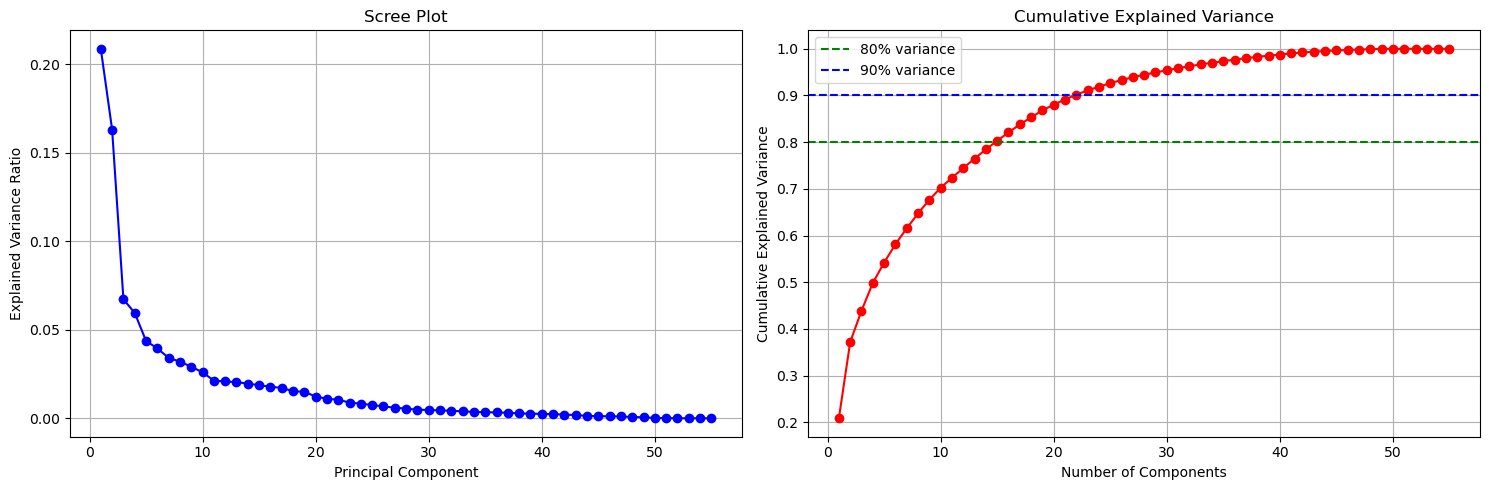

Components for 80% variance: 15
Components for 80% variance: 18
Components for 90% variance: 22


In [8]:
# Fit PCA with all components first
pca_full = PCA()
pca_full.fit(df)

# Calculate cumulative explained variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot to find elbow
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
axes[0].plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Scree Plot')
axes[0].grid(True)

# Cumulative variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
axes[1].axhline(y=0.80, color='g', linestyle='--', label='80% variance')
axes[1].axhline(y=0.90, color='b', linestyle='--', label='90% variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Find number of components for 80% and 90% variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_components_85 = np.argmax(cumulative_variance >= 0.85) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Components for 80% variance: {n_components_80}")
print(f"Components for 80% variance: {n_components_85}")
print(f"Components for 90% variance: {n_components_90}")

### PCA With Robust Scaling - 80% variance selection

In [9]:
# Apply PCA with components for 80% variance
import joblib 
n_components = n_components_80
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df)
joblib.dump(pca, 'Data/pca_model.pkl')
print(f"✓ PCA model saved with {n_components} components")

# Convert to DataFrame for easier handling
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

print(f"\n{'='*60}")
print(f"PCA RESULTS")
print(f"{'='*60}")
print(f"Original shape: {df.shape}")
print(f"Reduced shape: {df_pca.shape}")
print(f"Dimensionality reduction: {df.shape[1]} → {n_components} features")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")
print(f"Features reduced by: {((df.shape[1] - n_components) / df.shape[1] * 100):.1f}%")

✓ PCA model saved with 15 components

PCA RESULTS
Original shape: (10492, 55)
Reduced shape: (10492, 15)
Dimensionality reduction: 55 → 15 features
Total variance explained: 80.30%
Features reduced by: 72.7%


##### What do these components represent

In [10]:
# Get feature contributions to each PC
components_df = pd.DataFrame(
    pca.components_,
    columns=df.columns,
    index=pca_columns
)

print(f"\n{'='*60}")
print(f"TOP CONTRIBUTING FEATURES PER COMPONENT")
print(f"{'='*60}")

# Analyze first 5 components
for i in range(min(5, n_components)):
    print(f"\n--- {pca_columns[i]} (Explains {pca.explained_variance_ratio_[i]:.2%} variance) ---")
    
    # Get top 10 absolute contributions
    pc_contributions = components_df.iloc[i].abs().sort_values(ascending=False)
    
    print("\nTop 10 Contributing Features:")
    for j, (feature, loading) in enumerate(pc_contributions.head(10).items(), 1):
        # Get actual loading (with sign)
        actual_loading = components_df.iloc[i][feature]
        print(f"  {j}. {feature}: {actual_loading:.3f} (|{loading:.3f}|)")


TOP CONTRIBUTING FEATURES PER COMPONENT

--- PC1 (Explains 20.86% variance) ---

Top 10 Contributing Features:
  1. blood_macros: 0.573 (|0.573|)
  2. Has_Kidney_Failure: -0.228 (|0.228|)
  3. Had_heart_attack: -0.228 (|0.228|)
  4. Had_Liver_COndition: -0.225 (|0.225|)
  5. Had_Thyroid: -0.220 (|0.220|)
  6. Had_Cancer: -0.219 (|0.219|)
  7. Has_Disability: -0.211 (|0.211|)
  8. Tested_for_HIV_Virus: -0.206 (|0.206|)
  9. Had_Arthritis: -0.198 (|0.198|)
  10. Had_high_blood_pressure: -0.186 (|0.186|)

--- PC2 (Explains 16.30% variance) ---

Top 10 Contributing Features:
  1. blood_macros: 0.815 (|0.815|)
  2. BODY_MEASURE_COMPOSITE: -0.170 (|0.170|)
  3. Tested_for_HIV_Virus: 0.163 (|0.163|)
  4. Had_Liver_COndition: 0.161 (|0.161|)
  5. Has_Kidney_Failure: 0.161 (|0.161|)
  6. Had_heart_attack: 0.160 (|0.160|)
  7. Had_Thyroid: 0.155 (|0.155|)
  8. Had_Cancer: 0.152 (|0.152|)
  9. Has_Disability: 0.145 (|0.145|)
  10. Had_Arthritis: 0.139 (|0.139|)

--- PC3 (Explains 6.72% variance)

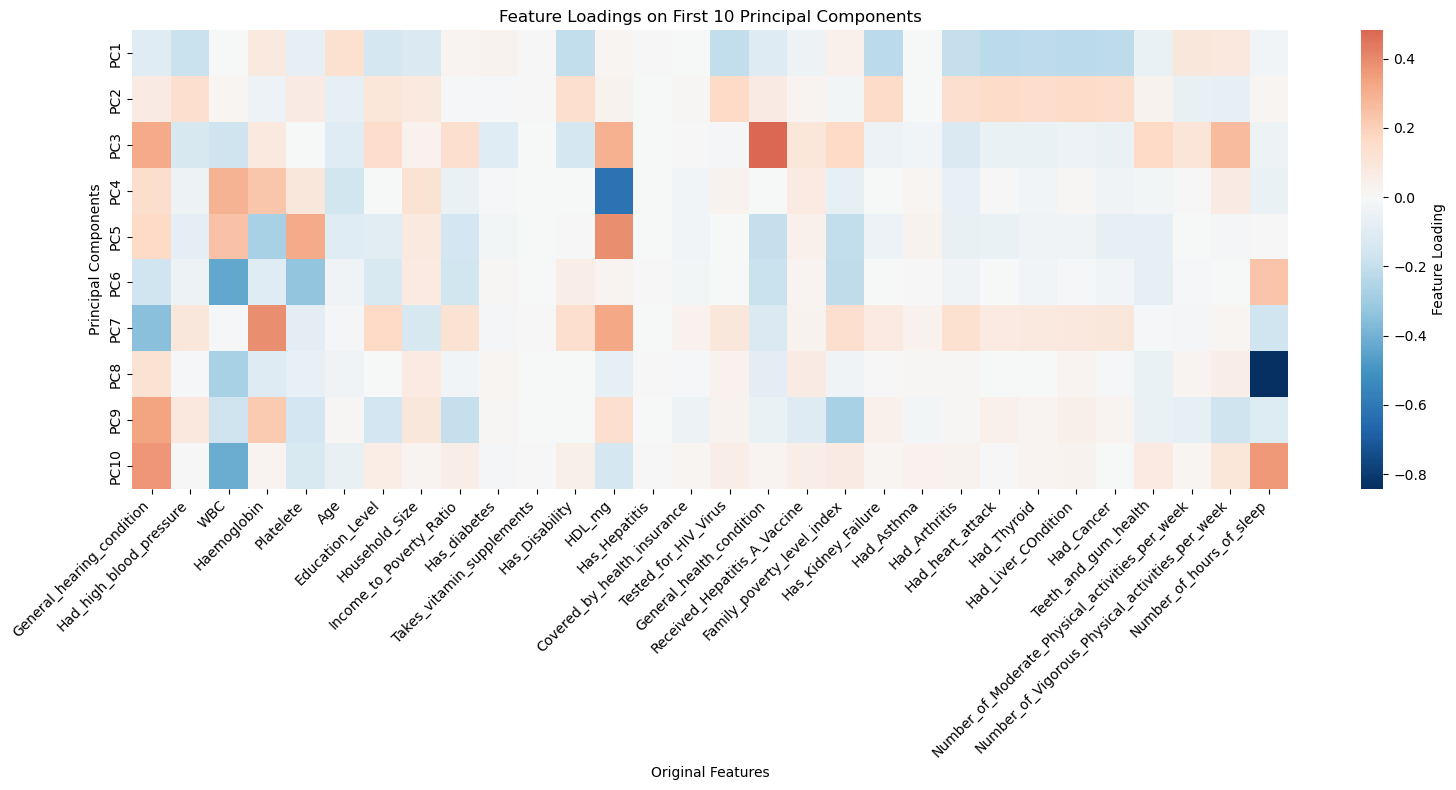

In [11]:
import seaborn as sns

# Heatmap of loadings
n_components_to_show = min(10, n_components)
n_features_to_show = min(30, df.shape[1])

plt.figure(figsize=(16, 8))
sns.heatmap(
    components_df.iloc[:n_components_to_show, :n_features_to_show], 
    cmap='RdBu_r', 
    center=0,
    annot=False,
    cbar_kws={'label': 'Feature Loading'},
    xticklabels=True,
    yticklabels=True
)
plt.title(f'Feature Loadings on First {n_components_to_show} Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.643886,-1.122140,2.537791,1.099319,-1.369180,-1.000934,0.412556,-1.210129,1.527971,1.999805,0.289292,0.966083,2.029509,-0.421655,1.479905
1,5.521503,5.381358,0.630654,-0.761986,-1.898238,-0.422578,1.608672,-1.188513,-1.060446,-0.196492,0.164946,0.480813,0.937488,0.781078,0.509243
2,0.125187,-1.359416,-1.530675,0.029985,0.985078,0.797654,-0.014865,0.654682,-0.015723,0.554539,-0.342296,1.340841,1.257426,1.938887,-0.536857
3,0.463894,-1.737125,-0.550389,0.748471,0.452760,0.676662,-0.761163,0.036764,1.061602,-0.939935,-0.379566,-0.160286,0.293775,-0.321141,-0.555914
4,0.683091,-1.870049,0.741572,-1.016563,-0.789394,-0.912539,-0.378118,-0.528257,-0.524212,0.065153,0.297295,-0.341651,0.444439,-0.649547,-0.072013


In [13]:
df_pca.to_csv('Data/pca_dataset.csv', index=False)
print("✓ Saved: pca_dataset.csv")

✓ Saved: pca_dataset.csv


### UMAP - Dimensionality Reduction Technique 2

In [14]:
import pandas as pd
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ============================================================
# STEP 1: Load Your Scaled Data
# ============================================================
# Load the same scaled data you used for PCA
df = pd.read_csv('Data/df_scaled.csv')
df = df.drop(columns='Unnamed: 0')


TESTING DIFFERENT UMAP DIMENSIONS

Testing 5 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.520
  Davies-Bouldin: 0.718

Testing 10 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.519
  Davies-Bouldin: 0.722

Testing 15 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.519
  Davies-Bouldin: 0.727

Testing 20 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.521
  Davies-Bouldin: 0.715

Testing 25 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.520
  Davies-Bouldin: 0.721

Testing 30 dimensions...


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


  Silhouette: 0.524
  Davies-Bouldin: 0.713


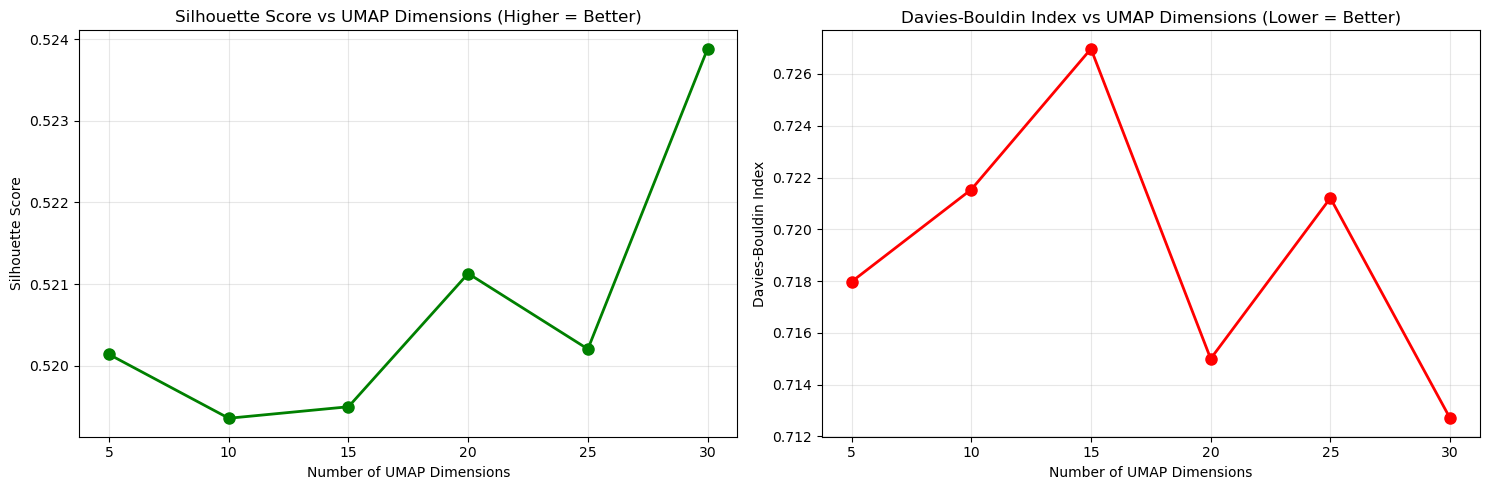


OPTIMAL DIMENSIONS
Best by Silhouette: 30 dimensions
Best by Davies-Bouldin: 30 dimensions


In [15]:
# ============================================================
# STEP 2: Determine Optimal UMAP Dimensions
# ============================================================
print("\n" + "="*60)
print("TESTING DIFFERENT UMAP DIMENSIONS")
print("="*60)

# Test different dimensions to see variance preservation
# We'll use clustering quality as a proxy since UMAP doesn't have explained variance
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

dimension_range = [5, 10, 15, 20, 25, 30]
metrics = {
    'dimensions': [],
    'silhouette': [],
    'davies_bouldin': []
}

for n_dim in dimension_range:
    print(f"\nTesting {n_dim} dimensions...")
    
    # Apply UMAP
    umap_test = umap.UMAP(
        n_components=n_dim,
        n_neighbors=15,
        min_dist=0.0,
        metric='euclidean',
        random_state=42
    )
    
    data_reduced = umap_test.fit_transform(df)
    
    # Test with clustering (k=5)
    kmeans_test = KMeans(n_clusters=5, random_state=42, n_init=10)
    labels = kmeans_test.fit_predict(data_reduced)
    
    # Calculate metrics
    sil = silhouette_score(data_reduced, labels)
    db = davies_bouldin_score(data_reduced, labels)
    
    metrics['dimensions'].append(n_dim)
    metrics['silhouette'].append(sil)
    metrics['davies_bouldin'].append(db)
    
    print(f"  Silhouette: {sil:.3f}")
    print(f"  Davies-Bouldin: {db:.3f}")

# Plot metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(metrics['dimensions'], metrics['silhouette'], 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of UMAP Dimensions')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score vs UMAP Dimensions (Higher = Better)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(metrics['dimensions'], metrics['davies_bouldin'], 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of UMAP Dimensions')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('Davies-Bouldin Index vs UMAP Dimensions (Lower = Better)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal dimensions
best_sil_idx = np.argmax(metrics['silhouette'])
best_db_idx = np.argmin(metrics['davies_bouldin'])

print(f"\n{'='*60}")
print(f"OPTIMAL DIMENSIONS")
print(f"{'='*60}")
print(f"Best by Silhouette: {metrics['dimensions'][best_sil_idx]} dimensions")
print(f"Best by Davies-Bouldin: {metrics['dimensions'][best_db_idx]} dimensions")

In [16]:
# ============================================================
# STEP 3: Apply UMAP with Chosen Dimensions
# ============================================================

# Choose dimensions
n_components_umap = 20 #Going with 20 because we need to look at half the number of components 

print(f"\n{'='*60}")
print(f"APPLYING UMAP WITH {n_components_umap} COMPONENTS")
print(f"{'='*60}")

umap_reducer = umap.UMAP(
    n_components=n_components_umap,
    n_neighbors=15,          # Controls local vs global structure (5-50)
    min_dist=0.0,            # 0.0 for clustering, 0.1-0.5 for visualization
    metric='euclidean',
    random_state=42,
    verbose=True
)

df_umap = umap_reducer.fit_transform(df)

# Convert to DataFrame
umap_columns = [f'UMAP{i+1}' for i in range(n_components_umap)]
df_umap = pd.DataFrame(df_umap, columns=umap_columns)

print(f"\n{'='*60}")
print(f"UMAP RESULTS")
print(f"{'='*60}")
print(f"Original shape: {df.shape}")
print(f"Reduced shape: {df_umap.shape}")
print(f"Dimensionality reduction: {df.shape[1]} → {n_components_umap} features")
print(f"Features reduced by: {((df.shape[1] - n_components_umap) / df.shape[1] * 100):.1f}%")


APPLYING UMAP WITH 20 COMPONENTS
UMAP(min_dist=0.0, n_components=20, n_jobs=1, random_state=42, verbose=True)
Fri Oct 24 22:19:21 2025 Construct fuzzy simplicial set
Fri Oct 24 22:19:21 2025 Finding Nearest Neighbors
Fri Oct 24 22:19:21 2025 Building RP forest with 10 trees


C:\Users\vickv\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Fri Oct 24 22:19:21 2025 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	Stopping threshold met -- exiting after 5 iterations
Fri Oct 24 22:19:22 2025 Finished Nearest Neighbor Search
Fri Oct 24 22:19:22 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Oct 24 22:19:49 2025 Finished embedding

UMAP RESULTS
Original shape: (10492, 55)
Reduced shape: (10492, 20)
Dimensionality reduction: 55 → 20 features
Features reduced by: 63.6%


In [17]:
# ============================================================
# STEP 4: Analyze UMAP Components
# ============================================================

# UMAP doesn't have loadings like PCA, but we can check correlations
print(f"\n{'='*60}")
print(f"UMAP COMPONENT CORRELATIONS WITH ORIGINAL FEATURES")
print(f"{'='*60}")

# Calculate correlations between UMAP components and original features
correlations = []
for i in range(min(5, n_components_umap)):
    print(f"\n--- UMAP{i+1} ---")
    corr_with_features = df.corrwith(df_umap[f'UMAP{i+1}']).abs().sort_values(ascending=False)
    
    print("Top 10 Correlated Original Features:")
    for j, (feature, corr) in enumerate(corr_with_features.head(10).items(), 1):
        print(f"  {j}. {feature}: {corr:.3f}")


UMAP COMPONENT CORRELATIONS WITH ORIGINAL FEATURES

--- UMAP1 ---
Top 10 Correlated Original Features:
  1. Marital_Status_Unknown: 0.994
  2. Has_Kidney_Failure: 0.965
  3. Had_heart_attack: 0.964
  4. Had_Liver_COndition: 0.954
  5. Had_Thyroid: 0.909
  6. Had_Cancer: 0.904
  7. Has_Disability: 0.881
  8. Tested_for_HIV_Virus: 0.873
  9. Had_Arthritis: 0.826
  10. Had_high_blood_pressure: 0.809

--- UMAP2 ---
Top 10 Correlated Original Features:
  1. blood_macros: 0.784
  2. Tested_for_HIV_Virus: 0.301
  3. Marital_Status_Unknown: 0.278
  4. Had_Liver_COndition: 0.275
  5. Has_Kidney_Failure: 0.275
  6. Had_heart_attack: 0.274
  7. Had_Cancer: 0.269
  8. Education_Level: 0.267
  9. Had_Thyroid: 0.266
  10. Had_high_blood_pressure: 0.256

--- UMAP3 ---
Top 10 Correlated Original Features:
  1. blood_macros: 0.751
  2. Education_Level: 0.153
  3. Covered_by_health_insurance: 0.132
  4. Income_to_Poverty_Ratio: 0.121
  5. Marital_Status_Never married: 0.118
  6. Family_poverty_level_in

In [18]:
# ============================================================
# STEP 6: Save Results
# ============================================================

# Save UMAP-reduced data for clustering
df_umap.to_csv('Data/umap_dataset.csv', index=False)

#### Notes:
- The two famous dimensionality reduction techniques are PCA and UMAP
- SVD is fien but works well for sparse datasets- our dataset is not sparse and is very dense so we ignore it
- Techniques like t-SNE are most likely used to visualize the results of the clusters after a clustering algorithm is run so that we can reduce the dimension of the dataframe for better visualization in 2D/3D